In [59]:
#Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

#Upload from csv
data_set_path = "school_attendance.csv"
all_students_path = "all_students_df.csv"

#Read data and results
data_set_df = pd.read_csv(data_set_path)
all_students_df = pd.read_csv(all_students_path)

data_set_df.head(15)



,District code,District name,Category,Student group,2021-2022 student count - year to date,2021-2022 attendance rate - year to date,2020-2021 student count,2020-2021 attendance rate,2019-2020 student count,2019-2020 attendance rate,Reporting period,Date update
0,00000CT,Connecticut,NaN,All Students,500285,0.9169,496092.0,0.9294,508346.0,0.9479,June 2022,07/22/2022
1,00000CT,Connecticut,Homelessness,Students Experiencing Homelessness,1814,0.8348,1735.0,0.8155,3916.0,0.8884,June 2022,07/22/2022
2,00000CT,Connecticut,Students With Disabilities,Students With Disabilities,78417,0.8899,76487.0,0.8946,80365.0,0.9277,June 2022,07/22/2022
3,00000CT,Connecticut,Free/Reduced Lunch,Free Meal Eligible,168984,0.8851,176225.0,0.8861,193706.0,0.9314,June 2022,07/22/2022
4,00000CT,Connecticut,Free/Reduced Lunch,Reduced Price Meal Eligible,29905,0.9184,30886.0,0.9299,27507.0,0.9518,June 2022,07/22/2022
5,00000CT,Connecticut,Free/Reduced Lunch,Free/Reduced Price Meal Eligible,198889,0.8901,207111.0,0.8927,221213.0,0.9340,June 2022,07/22/2022
6,00000CT,Connecticut,English Learners,English Learners,43571,0.8976,40619.0,0.8948,45413.0,0.9389,June 2022,07/22/2022
7,00000CT,Connecticut,Race/Ethnicity,All other races,48700,0.9314,47339.0,0.9483,47260.0,0.9559,June 2022,07/22/2022
8,00000CT,Connecticut,Race/Ethnicity,Black or African American,63099,0.8941,62267.0,0.8931,64200.0,0.9401,June 2022,07/22/2022
9,00000CT,Connecticut,Race/Ethnicity,Hispanic/Latino of any race,146298,0.8935,138260.0,0.8975,136953.0,0.9362,June 2022,07/22/2022


In [15]:
#Drop Connecticut
all_students_df = all_students_df.drop(0)


In [76]:
#Limit by group
#Disabilities
dis_df = data_set_df.loc[data_set_df["Student group"]=="Students With Disabilities"]
#Drop Connecticut
dis_df = dis_df.drop(2)

#FR Meal
fr_df = data_set_df.loc[data_set_df["Student group"]=="Free/Reduced Price Meal Eligible"]
#Drop Connecticut
fr_df = fr_df.drop(5)

#Ell
ell_df = data_set_df.loc[data_set_df["Student group"]=="English Learners"]
#Drop Connecticut
ell_df = ell_df.drop(6)

#Black
black_df = data_set_df.loc[data_set_df["Student group"]=="Black or African American"]
#Drop Connecticut
black_df =black_df.drop(8)

#Hispanic
his_df = data_set_df.loc[data_set_df["Student group"]=="Hispanic/Latino of any race"]
#Drop Connecticut
his_df = his_df.drop(9)

#White
white_df = data_set_df.loc[data_set_df["Student group"]=="White"]
#Drop Connecticut
white_df = white_df.drop(10)

#High Needs
needs_df = data_set_df.loc[data_set_df["Student group"]=="Students With High Needs"]
#Drop Connecticut
needs_df = needs_df.drop(12)

#Not High Needs
not_needs_df = data_set_df.loc[data_set_df["Student group"]=="Students Without High Needs"]
not_needs_df = not_needs_df.drop(11)

In [42]:
#Find Mean All
attendance_2022_mean = all_students_df["2021-2022 attendance rate - year to date"].mean()
attendance_2021_mean = all_students_df["2020-2021 attendance rate"].mean()
attendance_2020_mean = all_students_df["2019-2020 attendance rate"].mean()


#Find Mean Dis
dis_2022_mean = dis_df["2021-2022 attendance rate - year to date"].mean()
dis_2021_mean = dis_df["2020-2021 attendance rate"].mean()
dis_2020_mean = dis_df["2019-2020 attendance rate"].mean()

#Find Mean FR
fr_2022_mean = fr_df["2021-2022 attendance rate - year to date"].mean()
fr_2021_mean = fr_df["2020-2021 attendance rate"].mean()
fr_2020_mean = fr_df["2019-2020 attendance rate"].mean()

#Find Mean ELL
ell_2022_mean = ell_df["2021-2022 attendance rate - year to date"].mean()
ell_2021_mean = ell_df["2020-2021 attendance rate"].mean()
ell_2020_mean = ell_df["2019-2020 attendance rate"].mean()



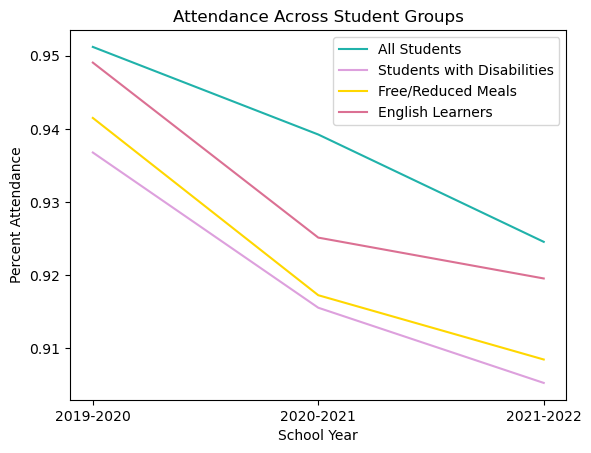

In [62]:
#Student Groups Line Graph
x = ["2019-2020", "2020-2021", "2021-2022"]
all_student = [attendance_2020_mean, attendance_2021_mean, attendance_2022_mean]
dis = [dis_2020_mean, dis_2021_mean, dis_2022_mean]
fr = [fr_2020_mean, fr_2021_mean, fr_2022_mean]
ell = [ell_2020_mean, ell_2021_mean, ell_2022_mean]

plt.plot(x, all_student, color="lightseagreen", label = "All Students")
plt.plot(x, dis, color="plum", label = "Students with Disabilities")
plt.plot(x, fr, color="gold", label = "Free/Reduced Meals")
plt.plot(x, ell, color = "palevioletred", label="English Learners")

plt.xlabel("School Year")
plt.ylabel("Percent Attendance")
plt.legend()
plt.title("Attendance Across Student Groups")

plt.savefig("Images/StudentGroupsLinePlot.png")
plt.show()

In [66]:
#Races Graph
#Find Black
black_2022_mean = black_df["2021-2022 attendance rate - year to date"].mean()
black_2021_mean = black_df["2020-2021 attendance rate"].mean()
black_2020_mean = black_df["2019-2020 attendance rate"].mean()

#Find Hispanic
his_2022_mean = his_df["2021-2022 attendance rate - year to date"].mean()
his_2021_mean = his_df["2020-2021 attendance rate"].mean()
his_2020_mean = his_df["2019-2020 attendance rate"].mean()

#Find White
white_2022_mean = white_df["2021-2022 attendance rate - year to date"].mean()
white_2021_mean = white_df["2020-2021 attendance rate"].mean()
white_2020_mean = white_df["2019-2020 attendance rate"].mean()

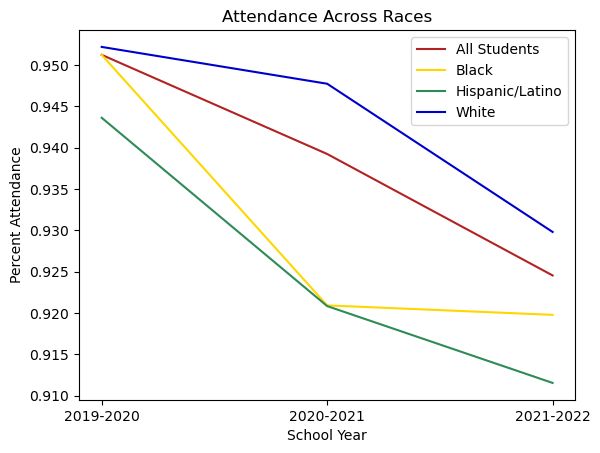

In [71]:
#Races Line PLot
x = ["2019-2020", "2020-2021", "2021-2022"]
all_student = [attendance_2020_mean, attendance_2021_mean, attendance_2022_mean]
black = [black_2020_mean, black_2021_mean, black_2022_mean]
his = [his_2020_mean, his_2021_mean, his_2022_mean]
white = [white_2020_mean, white_2021_mean, white_2022_mean]

plt.plot(x, all_student, color="firebrick", label = "All Students")
plt.plot(x, black, color="gold", label = "Black")
plt.plot(x, his, color="seagreen", label = "Hispanic/Latino")
plt.plot(x, white, color = "mediumblue", label="White")

plt.xlabel("School Year")
plt.ylabel("Percent Attendance")
plt.legend()
plt.title("Attendance Across Races")

plt.savefig("Images/RaceLinePlot.png")
plt.show()

In [77]:
#High Needs Graph
#Find High Needs
needs_2022_mean = needs_df["2021-2022 attendance rate - year to date"].mean()
needs_2021_mean = needs_df["2020-2021 attendance rate"].mean()
needs_2020_mean = needs_df["2019-2020 attendance rate"].mean()

#Find Not High Needs
not_needs_2022_mean = not_needs_df["2021-2022 attendance rate - year to date"].mean()
not_needs_2021_mean = not_needs_df["2020-2021 attendance rate"].mean()
not_needs_2020_mean = not_needs_df["2019-2020 attendance rate"].mean()

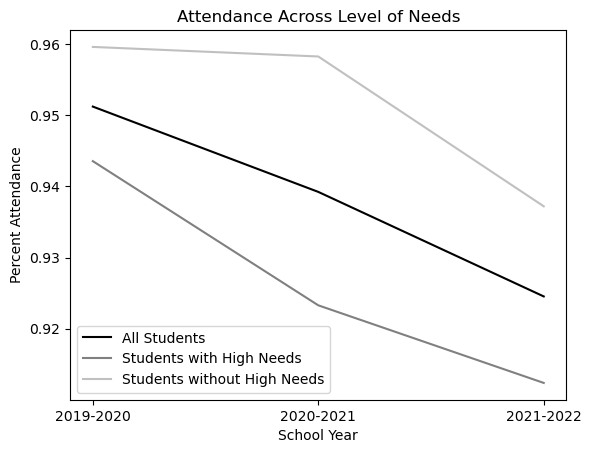

In [78]:
#High Needs Line PLot
x = ["2019-2020", "2020-2021", "2021-2022"]
all_student = [attendance_2020_mean, attendance_2021_mean, attendance_2022_mean]
needs = [needs_2020_mean, needs_2021_mean, needs_2022_mean]
not_needs = [not_needs_2020_mean, not_needs_2021_mean, not_needs_2022_mean]


plt.plot(x, all_student, color="black", label = "All Students")
plt.plot(x, needs, color="gray", label = "Students with High Needs")
plt.plot(x, not_needs, color="silver", label = "Students without High Needs")


plt.xlabel("School Year")
plt.ylabel("Percent Attendance")
plt.legend()
plt.title("Attendance Across Level of Needs")

plt.savefig("Images/NeedsLinePlot.png")
plt.show()